In [1]:
import pandas as pd
import numpy as np

In [2]:
df_headers=pd.read_csv('/media/jhomara/Datos/MG-DCC/tesis/Desarrollo/datos/resultadosFinales/headersFile.csv', sep='\t', names=['file', 'header'])

In [3]:
df_headers.head()

,file,header
0,Ichibu Station (Nara).html.bz2,",ikoma line g19,service"
1,Mag%C3%A1n %26 Rodr%C3%ADguez.html.bz2,"album details,peak chart positions,spain,suave..."
2,Cool Woods.html.bz2,"rating,review scores,source"
3,Mag%C3%A1n %26 Rodr%C3%ADguez.html.bz2,"album details,suave ep,suave ep 2,suave ep 3,t..."
4,Mag%C3%A1n %26 Rodr%C3%ADguez.html.bz2,"chart positions,spain,title,year"


In [4]:
df_h=pd.DataFrame(df_headers.iloc[:]['header'], df_headers.index, columns=['header'])
df_h.head()

,header
0,",ikoma line g19,service"
1,"album details,peak chart positions,spain,suave..."
2,"rating,review scores,source"
3,"album details,suave ep,suave ep 2,suave ep 3,t..."
4,"chart positions,spain,title,year"


In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jhomara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def stemm_text(text):
    s=str(text).split(",")
    sw=[]
    for h in s:
        if h=="":
            continue
        hs=h.split()
        if len(hs)>1:
            sw.append(" ".join([stemmer.stem(str(x)) for x in hs if x!=""]))
        else:
            sw.append(h)    
    return ",".join([stemmer.stem(str(x)) for x in sw if x!=""])
df_h['header_lemmatized'] = df_h["header"].apply(lambda x: stemm_text(x))
df_h.head()

,header,header_lemmatized
0,",ikoma line g19,service","ikoma line g19,servic"
1,"album details,peak chart positions,spain,suave...","album detail,peak chart posit,spain,suav,titl,..."
2,"rating,review scores,source","rate,review scor,sourc"
3,"album details,suave ep,suave ep 2,suave ep 3,t...","album detail,suav ep,suav ep 2,suav ep 3,titl,..."
4,"chart positions,spain,title,year","chart posit,spain,titl,year"


In [7]:
df_hl=pd.DataFrame(df_h.iloc[:]['header_lemmatized'], df_h.index, columns=['header_lemmatized'])
df_hl.head()

,header_lemmatized
0,"ikoma line g19,servic"
1,"album detail,peak chart posit,spain,suav,titl,..."
2,"rate,review scor,sourc"
3,"album detail,suav ep,suav ep 2,suav ep 3,titl,..."
4,"chart posit,spain,titl,year"


In [8]:
df_hl=pd.DataFrame({'count' : df_hl.groupby("header_lemmatized").size()}).reset_index()
result = df_hl.sort_values(['count'], ascending=False)
result.head()

,header_lemmatized,count
926446,nan,88392
955002,"rate,review scor,sourc",73944
901158,"length,no,titl",63529
663226,"candid,major,parti,swing,turnout,vote",57380
663624,"candid,parti,vote",43614


Total Tables:

In [9]:
df_hl=df_hl.dropna()
sum(df_hl['count'])

3565134

Total distinct headers

In [10]:
print(df_hl.count())
df_hl.head()

header_lemmatized    975850
count                975850
dtype: int64


,header_lemmatized,count
0,"0 0 0 0 0,0 0 0 1 1,0 0 1 0 2,0 1 0 0 4,1 0 0 ...",1
1,"0 0 0 0 0,10 8 16 41 47,113 87 70 413 311,113 ...",1
2,"0 0 0 0 13 5,kell,kilbeg",1
3,"0 0 0 0 2 0 agg,debreceni vsc,szombathelyi haladá",1
4,"0 0 0 0 2 1,doncarney,grangegeeth",1


Filter of tables with more than one header

In [11]:
df_hl.loc[:,'correct_header']=df_hl.header_lemmatized.apply(lambda x: len(x.split(","))>1)
df_filtered=df_hl[df_hl['correct_header']]
df_filtered.count()

header_lemmatized    940135
count                940135
correct_header       940135
dtype: int64

In [12]:
df_filtered.sort_values(['count'], ascending=False).head()

,header_lemmatized,count,correct_header
955002,"rate,review scor,sourc",73944,True
901158,"length,no,titl",63529,True
663226,"candid,major,parti,swing,turnout,vote",57380,True
663624,"candid,parti,vote",43614,True
762712,"countri,descript,ship",30479,True


#### Distribution of number of headers. 

In [13]:
import matplotlib.pyplot as plt
from scipy import special
import matplotlib

[1.55054610e+00 3.87636524e-01 1.72282900e-01 ... 2.83605104e-10
 2.83597433e-10 2.83589762e-10]


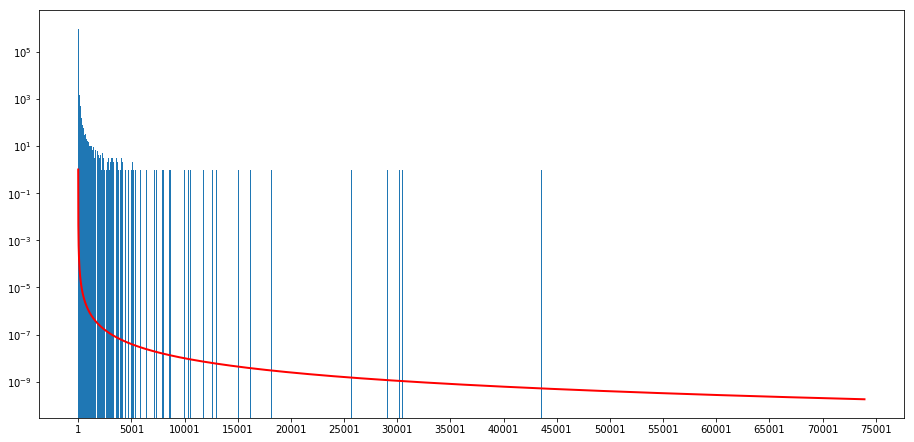

In [14]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15.5, 7.5)
plt.hist(df_filtered['count'], log=True,  bins=1000)
a=2.
x=np.arange(1,df_filtered['count'].max())
y=x**(-a)/special.zetac(a)
print(y)
plt.plot(x,y/max(y), linewidth=2, color='r')
plt.xticks(np.arange(min(x), max(x)+5000, 5000.0))
plt.show()

Filter headers with more than 100 tables.

In [15]:
print("Mayor a 1:")
print(df_filtered[df_filtered['count']>1].count())
print("Igual a 1:")
print(df_filtered[df_filtered['count']==1].count())


Mayor a 1:
header_lemmatized    162434
count                162434
correct_header       162434
dtype: int64
Igual a 1:
header_lemmatized    777701
count                777701
correct_header       777701
dtype: int64


In [16]:
df_filtered.iloc[1089]['header_lemmatized']

'0 0,0 1,0 11,0 2,0 6,1 1,1 3,2 3,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,7 11,sr,tournament,w l,win loss'

In [17]:
df_filtered[df_filtered['count']==1].to_csv("one_table.csv", sep="\t")

In [25]:
df_f1=df_filtered[df_filtered['count']>100]
df_f1.count()

header_lemmatized    2038
count                2038
correct_header       2038
dtype: int64

In [26]:
df_f1.sort_values(['count'], ascending=True).head()

,header_lemmatized,count,correct_header
207151,"1,2,total",101,True
689458,"championship,date,no,oppon in the fin,outcom,s...",101,True
958344,"result,stipul,time",101,True
482611,"ak,al,ar,az,ca,co,ct,de,fl,ga,hi,ia,id,il,in,k...",101,True
702084,"chart 2007 08,peakposit",101,True


### Clustering of headers with more than 100 tables. 

The max distance (eps) for the DBscan clustering is 0,5.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
#Token_pattern changed because there is headers with one letter. 
vectorizer = CountVectorizer(list(df_f1['header_lemmatized']), token_pattern='(?u)\\b\\w+\\b')
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8',
        input=['0 9,1,10 19,20 29,30 39,40 49,50 59,60 69,70 79,80,a,b,by sex,femal,i,male,measur unit,of which in,popul by age group in 2002,specif,total', '0,1,app,goal,nation team,total,year', '0,1,app,goal,total,year', '0,2,app,goal,nation team,total,year', '0,2,app,goal,total,year', '0,3,app,goal,total...'titl,voic rol,year', 'titl,year', 'vote on ret,vote', 'winner,year', 'women s doubl,women s singl'],
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w+\\b', tokenizer=None,
        vocabulary=None)

In [28]:
dtm = vectorizer.fit_transform(df_f1['header_lemmatized'])
vocab = vectorizer.get_feature_names()

In [29]:
vocab = np.array(vocab)
vocab

array(['0', '01', '02', ..., 'yellow', 'yes', 'zip'], dtype='<U35')

In [30]:
dtm= dtm.toarray()

In [31]:
dtm.shape

(2038, 1806)

In [32]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.5, min_samples=2, metric="jaccard", n_jobs=4).fit(dtm)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
np.unique(labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [46]:
clusters={}
csv=""
for i, label in enumerate(labels):
    #if label!=-1:
        if clusters.get(label)==None:
            clusters[label]=1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header_lemmatized']+"\n"
        else:
            clusters[label]=clusters.get(label)+1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header_lemmatized']+"\n"

In [48]:
# Generates a cluster file. 
csv_file = open("clusters1.csv", "w")
csv_file.write(csv)
csv_file.close()

df_cluster=pd.read_csv('clusters1.csv', sep='\t', names=['cluster','header_lemmatized'])
df_cluster.head()

,cluster,header_lemmatized
0,-1,"0 9,1,10 19,20 29,30 39,40 49,50 59,60 69,70 7..."
1,0,"0,1,app,goal,nation team,total,year"
2,0,"0,1,app,goal,total,year"
3,0,"0,2,app,goal,nation team,total,year"
4,0,"0,2,app,goal,total,year"


DBSCAN(n_jobs=4) doesn't work. The following code gets distance matrix first using a number of jobs. 

In [49]:
from sklearn.metrics.pairwise import pairwise_distances
#res = 1-pdist(dtm, 'jaccard')
res = pairwise_distances(dtm, metric = "jaccard", n_jobs=4)
#squareform(res)

/home/jhomara/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


In [51]:
distance = pd.DataFrame(res, index=np.arange(dtm.shape[0]), columns= np.arange(dtm.shape[0]))
np.round(distance, 2)

from numpy import isnan
where_are_NaNs = isnan(distance)
distance[where_are_NaNs] = 0.0

In [52]:
db = DBSCAN(eps=0.5, min_samples=2, metric="precomputed").fit(distance)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Num clusters:",len(np.unique(labels)))
clusters={}
csv=""
for i, label in enumerate(labels):
    #if label!=-1:
        if clusters.get(label)==None:
            clusters[label]=1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header_lemmatized']+"\n"
        else:
            clusters[label]=clusters.get(label)+1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header_lemmatized']+"\n"
            
csv_file = open("clusters2.csv", "w")
csv_file.write(csv)
csv_file.close()

df_cluster=pd.read_csv('clusters2.csv', sep='\t', names=['cluster','header_lemmatized'])


Num clusters: 143


# Using HDBSCAN clustering

In [74]:
import hdbscan
clusterer = hdbscan.HDBSCAN(metric="precomputed",  min_samples=2, min_cluster_size=2, gen_min_span_tree=True)
clusterer.fit(distance)

clusters={}
csv=""
for i, label in enumerate(clusterer.labels_):
    #if label!=-1:
        if clusters.get(label)==None:
            clusters[label]=1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header_lemmatized']+"\n"
        else:
            clusters[label]=clusters.get(label)+1
            csv=csv+str(label)+"\t"+df_f1.iloc[i]['header_lemmatized']+"\n"
            
csv_file = open("clusters_hd.csv", "w")
csv_file.write(csv)
csv_file.close()

df_cluster_hd=pd.read_csv('clusters_hd.csv', sep='\t', names=['cluster','header'])
np.unique(clusterer.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

It was joined the frame that contains (DBSCAN) clusters with the main file that contains the name of file. 

In [77]:
df_filtered=df_filtered.rename(columns = {'header_lemmatized':'header'})
cols = ['header']
df_merge=df_filtered.join(df_cluster_hd.set_index(cols), on=cols)

In [78]:
df_merg1=df_headers.join(df_merge.set_index(cols), on=cols)

In [79]:
clusters_df=df_merg1[df_merg1['count']>100].sort_values(['count','header'], ascending=False).reset_index()
clusters_df.head()

,index,file,header,count,correct_header,cluster
0,499,2012 USASA Region III National Cup.html.bz2,"d,ga,gd,gf,l,pld,pts,team,w",12945.0,True,266.0
1,2102,2014 IWRF World Championship.html.bz2,"d,ga,gd,gf,l,pld,pts,team,w",12945.0,True,266.0
2,2133,2014 IWRF World Championship.html.bz2,"d,ga,gd,gf,l,pld,pts,team,w",12945.0,True,266.0
3,3254,2006%E2%80%9307 FC Dinamo Bucure%C8%99ti seaso...,"d,ga,gd,gf,l,pld,pts,team,w",12945.0,True,266.0
4,4595,1996 Campeonato Brasileiro S%C3%A9rie B.html.bz2,"d,ga,gd,gf,l,pld,pts,team,w",12945.0,True,266.0


### Number of tables by cluster:

In [80]:
cluster_count=clusters_df.groupby(['cluster']).size().reset_index('cluster')

In [81]:
cluster_count.iloc[3][0]

607.0

#### Creating a random list of tables by cluster.

In [83]:
import numpy as np
df_test=pd.DataFrame(columns=['level_0','index','file','header','count','correct_header','cluster'])
for ind in range(cluster_count.shape[0]): 
    if ind>0:
        val=int(cluster_count.iloc[ind][0])
        chosen_idx = np.random.choice(val, replace=True, size=20)
        temp=clusters_df[clusters_df['cluster']==cluster_count.iloc[ind]['cluster']].reset_index()           
        df_test=df_test.append(temp.iloc[chosen_idx])
df_test.head()

,level_0,index,file,header,count,correct_header,cluster
307,96064,1693964,2013 Detroit Lions season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0
24,95781,131704,2004 Green Bay Packers season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0
477,96234,2676361,2003 New York Jets season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0
518,96275,2872040,2012 Tampa Bay Buccaneers season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0
384,96141,2166648,2011 Buffalo Bills season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0


In [85]:
clusters_df[clusters_df['header']=='afc,east,nfc,north,south,west'].head()

,index,file,header,count,correct_header,cluster
95757,2928,2003 Carolina Panthers season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0
95758,11648,2016 Buffalo Bills season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0
95759,21657,2007 Denver Broncos season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0
95760,26239,2008 New Orleans Saints season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0
95761,29950,2002 Houston Texans season.html.bz2,"afc,east,nfc,north,south,west",639.0,True,0.0


In [86]:
df_test.to_csv('test_cluster1.csv', sep='\t')